# Name: Jacob Brock
### Date: 09 September 2023

<style>
.jp-Notebook {
    padding: var(--jp-notebook-padding);
    margin-left: 160px;
    outline: none;
    overflow: auto;
    background: var(--jp-layout-color0);
}
</style>

<img src="https://cdn.nba.com/logos/nba/1610612760/primary/L/logo.svg" alt="logo" style="position: fixed; top: -40px; left: 5px; height: 250px;">

# Introduction  

The purpose of this project is to gauge your technical skills and problem solving ability by working through something similar to a real NBA data science project. You will work your way through this jupyter notebook, answering questions as you go along. Please begin by adding your name to the top markdown chunk in this document. When you're finished with the document, come back and type your answers into the answer key at the top. Please leave all your work below and have your answers where indicated below as well. Please note that we will be reviewing your code so make it clear, concise and avoid long printouts. Feel free to add in as many new code chunks as you'd like.

Remember that we will be grading the quality of your code and visuals alongside the correctness of your answers. Please try to use packages like pandas/numpy and matplotlib/seaborn as much as possible (instead of base python data manipulations and explicit loops.)  

**WARNING:** Your project will **ONLY** be graded if it's knit to an HTML document where we can see your code. Be careful to make sure that any long lines of code appropriately visibly wrap around visibly to the next line, as code that's cut off from the side of the document cannot be graded.  

**Note:**    

**Throughout this document, any `season` column represents the year each season started. For example, the 2015-16 season will be in the dataset as 2015. For most of the rest of the project, we will refer to a season by just this number (e.g. 2015) instead of the full text (e.g. 2015-16).** 

# Answers  

## Part 1      

**Question 1:**   

- 1st Team: XX.X points per game  
- 2nd Team: XX.X points per game  
- 3rd Team: XX.X points per game  
- All-Star: XX.X points per game   

**Question 2:** XX.X Years  

**Question 3:** 

- Elite: X players.  
- All-Star: X players.  
- Starter: X players.  
- Rotation: X players.  
- Roster: X players.  
- Out of League: X players.  

**Open Ended Modeling Question:** Please show your work and leave all responses below in the document.


## Part 2  

**Question 1:** XX.X%   
**Question 2:** Written question, put answer below in the document.    
**Question 3:** Written question, put answer below in the document.    
  


# Setup and Data    

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
# Note you will likely have to change these paths. 
# If your data is in the same folder as this project, 
# the paths will likely be fixe|d for you by deleting ../../Data/awards_project/ from each string.
awards = pd.read_csv("C:/Users/jacob/Desktop/OKC/awards_data.csv")
player_data = pd.read_csv("C:/Users/jacob/Desktop/OKC/player_stats.csv")
team_data = pd.read_csv("C:/Users/jacob/Desktop/OKC/team_stats.csv")
rebounding_data = pd.read_csv("C:/Users/jacob/Desktop/OKC/team_rebounding_data_22.csv")

In [6]:
#Create a copy of the awards and player dataset to clean them for later use
awards2 = awards.copy()
player_data2 = player_data.copy()

In [7]:
#Create a list that includes each all nba selection and one for each all rookie selection
allNBA_columns = ['All NBA Defensive First Team','All NBA Defensive Second Team',
                    'All NBA First Team','All NBA Second Team','All NBA Third Team']
allRookie_columns = ['All Rookie First Team','All Rookie Second Team']

#Iterate through each row in awards2 and increment allNBA_Selections or allRookie_Selections
# if player was selected to one of the teams
awards2['allNBA_Selections'] = 0
for index, row in awards2.iterrows():
    if 1 in row[allNBA_columns].values:
        #Increment 'allNBA_Selections' by one if player selected to All NBA team
        awards2.at[index, 'allNBA_Selections'] += 1
awards2['allRookie_Selections'] = 0
for index, row in awards2.iterrows():
    if 1 in row[allRookie_columns].values:
        #Increment 'allNBA_Selections' by one if player selected to All NBA team
        awards2.at[index, 'allRookie_Selections'] += 1

# Create a function that will determine if a player won an award based on their ranking for that award
# Example, if a player was ranked 1 in the mvp ranks, he won the mvp award that season
awards2_func = lambda x: 0 if x != 1 else 1
awards2['dpoy'] = awards['Defensive Player Of The Year_rk'].apply(awards2_func)
awards2['mvp'] = awards['Most Valuable Player_rk'].apply(awards2_func)
awards2['allstar_rk'] = awards['allstar_rk'].apply(awards2_func)
awards2['most_imp'] = awards['Most Improved Player_rk'].apply(awards2_func)
awards2['roty'] = awards['Rookie Of The Year_rk'].apply(awards2_func)
awards2['smoty'] = awards['Sixth Man Of The Year_rk'].apply(awards2_func)

# Drop all of the columns in awards2 that are not needed
awards2.drop(columns=['All NBA Defensive First Team',
       'All NBA Defensive Second Team', 'All NBA First Team',
       'All NBA Second Team', 'All NBA Third Team', 'All Rookie First Team',
       'All Rookie Second Team','Player Of The Month', 'Player Of The Week', 'Rookie Of The Month',
       'allstar_rk','Defensive Player Of The Year_rk', 'Most Improved Player_rk',
       'Most Valuable Player_rk', 'Rookie Of The Year_rk',
       'Sixth Man Of The Year_rk', 'all_nba_points_rk',
       'all_rookie_points_rk'],inplace=True)
awards2.head()

,season,nbapersonid,Bill Russell NBA Finals MVP,all_star_game,rookie_all_star_game,allNBA_Selections,allRookie_Selections,dpoy,mvp,most_imp,roty,smoty
0,2007,708.0,0.0,True,False,1,0,1,0,0,0,0
1,2007,947.0,0.0,True,False,0,0,0,0,0,0,0
2,2007,948.0,0.0,NaN,NaN,1,0,0,0,0,0,0
3,2007,959.0,0.0,True,False,1,0,0,0,0,0,0
4,2007,977.0,0.0,True,False,1,0,0,1,0,0,0


In [8]:
"""Merged the awards dataset with the player_data dataset to be used for the first and second question.
I merged awards2 and player_data2 together and cleaned it for use in the rest of the questions."""
merged_playerData = pd.merge(awards,player_data, on='nbapersonid')
cleaned_mergedData = pd.merge(awards2,player_data2, on='nbapersonid')
cleaned_mergedData['PPG'] = round(cleaned_mergedData['points'] / cleaned_mergedData['games'],2)

# Ordered the columns for improved readability and to move the important columns to the front
order = ['nbapersonid','player','season_x', 'draftyear','draftpick','team', 'games',
        'games_start', 'mins','PPG','Bill Russell NBA Finals MVP','allNBA_Selections',
        'allRookie_Selections','dpoy', 'mvp', 'most_imp','roty', 'smoty','all_star_game','rookie_all_star_game','fgm', 'fga',
        'fgp', 'fgm3', 'fga3', 'fgp3', 'fgm2', 'fga2', 'fgp2', 'efg', 'ftm',
        'fta', 'ftp', 'off_reb', 'def_reb', 'tot_reb', 'ast', 'steals',
        'blocks', 'tov', 'tot_fouls', 'points', 'PER', 'FTr', 'off_reb_pct',
        'def_reb_pct', 'tot_reb_pct', 'ast_pct', 'stl_pct', 'blk_pct',
        'tov_pct', 'usg', 'OWS', 'DWS', 'WS', 'OBPM', 'DBPM', 'BPM', 'VORP']
cleaned_mergedData = cleaned_mergedData[order]
#Renamed season_x to season for improved clarity
cleaned_mergedData.rename(columns={'season_x':'season'},inplace=True)
cleaned_mergedData.head()

,nbapersonid,player,season,draftyear,draftpick,team,games,games_start,mins,PPG,...,blk_pct,tov_pct,usg,OWS,DWS,WS,OBPM,DBPM,BPM,VORP
0,708.0,Kevin Garnett,2007,1995,5.0,BOS,71,71,2328,18.83,...,0.031,0.108,0.255,6.6,6.2,12.9,4.7,3.5,8.2,6.0
1,708.0,Kevin Garnett,2007,1995,5.0,BOS,57,57,1772,15.77,...,0.031,0.101,0.234,3.0,4.1,7.1,2.8,3.0,5.7,3.5
2,708.0,Kevin Garnett,2007,1995,5.0,BOS,69,69,2060,14.35,...,0.022,0.104,0.221,3.6,3.8,7.3,1.5,1.9,3.5,2.9
3,708.0,Kevin Garnett,2007,1995,5.0,BOS,71,71,2220,14.87,...,0.020,0.111,0.223,3.4,5.6,9.0,1.8,2.9,4.7,3.8
4,708.0,Kevin Garnett,2007,1995,5.0,BOS,60,60,1864,15.78,...,0.025,0.111,0.249,2.6,4.3,6.9,1.8,2.5,4.3,2.9


## Part 1 -- Awards  

In this section, you're going to work with data relating to player awards and statistics. You'll start with some data manipulation questions and work towards building a model to predict broad levels of career success.  


### Question 1  

**QUESTION:** What is the average number of points per game for players in the 2007-2021 seasons who won All NBA First, Second, and Third teams (**not** the All Defensive Teams), as well as for players who were in the All-Star Game (**not** the rookie all-star game)?


 

In [148]:
# Merge player data and awards data together using nbapersonid as a common identifier
merged_playerData = pd.merge(awards,player_data, on='nbapersonid')

# Determine each players ppg per season using points divided by games played
merged_playerData['ppg'] = merged_playerData['points'] / merged_playerData['games']

# Create new DataFrames for each team by filtering merged_playerData by each team selection
first_team = merged_playerData[merged_playerData['All NBA First Team'] == 1]
second_team = merged_playerData[merged_playerData['All NBA Second Team'] == 1]
third_team = merged_playerData[merged_playerData['All NBA Third Team'] == 1]
all_star = merged_playerData[merged_playerData['all_star_game'] == 1]

In [149]:
# Get the average points per game for players selected in the first, second, third, or all-star team
# by averaging the points per game by each player selected each season
average_first_ppg = first_team['ppg'].mean()
average_second_ppg = second_team['ppg'].mean()
average_third_ppg = third_team['ppg'].mean()
average_allstar_ppg = all_star['ppg'].mean()

# Print the result for each team selection
print('Selected All NBA First Team Player Avg. PPG: {:.2f}'.format(average_first_ppg))
print('Selected All NBA Second Team Player Avg. PPG: {:.2f}'.format(average_second_ppg))
print('Selected All NBA Third Team Player Avg. PPG: {:.2f}'.format(average_third_ppg))
print('Selected All-Star Team Player Avg. PPG: {:.2f}'.format(average_first_ppg))

Selected All NBA First Team Player Avg. PPG: 22.31
Selected All NBA Second Team Player Avg. PPG: 19.60
Selected All NBA Third Team Player Avg. PPG: 17.41
Selected All-Star Team Player Avg. PPG: 22.31


<strong><span style="color:red">ANSWER 1:</span></strong>   

1st Team: 22.31 points per game  
2nd Team: 19.60 points per game  
3rd Team: 17.41 points per game  
All-Star: 22.31 points per game  

### Question 2  

**QUESTION:** What was the average number of years of experience in the league it takes for players to make their first All NBA Selection (1st, 2nd, or 3rd team)? Please limit your sample to players drafted in 2007 or later who did eventually go on to win at least one All NBA selection. For example:

- Luka Doncic is in the dataset as 2 years. He was drafted in 2018 and won his first All NBA award in 2019 (which was his second season).  
- LeBron James is not in this dataset, as he was drafted prior to 2007.  
- Lu Dort is not in this dataset, as he has not received any All NBA honors.  



In [150]:
# Create new DataFrame by filtering the merged dataframe only to include players
# drafted in or after 2007
drafted_2007_later = merged_playerData[merged_playerData['draftyear'] >= 2007].copy()

# Group by player and their first All NBA selection and calculate number of years
# experience at the time of first All NBA selection (YoE)
first_AllNBA_selection = drafted_2007_later.groupby('player')['season_x'].min()
drafted_2007_later['YoE'] = drafted_2007_later.apply(lambda row: row['season_x'] - first_AllNBA_selection[row['player']],axis=1)

#Calculate average years of experience before first All NBA selection and print
avg_experience = drafted_2007_later['YoE'].mean()
print("Average Years of Experience Before First All-NBA Selection (2007 or later draftees): {:.2f}".format(avg_experience))

Average Years of Experience Before First All-NBA Selection (2007 or later draftees): 3.75


<strong><span style="color:red">ANSWER 2:</span></strong>  

3.75 Years  

## Data Cleaning Interlude  

You're going to work to create a dataset with a "career outcome" for each player, representing the highest level of success that the player achieved for **at least two** seasons *after his first four seasons in the league* (examples to follow below!). To do this, you'll start with single season level outcomes. On a single season level, the outcomes are:  

- Elite: A player is "Elite" in a season if he won any All NBA award (1st, 2nd, or 3rd team), MVP, or DPOY in that season.    
- All-Star: A player is "All-Star" in a season if he was selected to be an All-Star that season.   
- Starter:  A player is a "Starter" in a season if he started in at least 41 games in the season OR if he played at least 2000 minutes in the season.    
- Rotation:  A player is a "Rotation" player in a season if he played at least 1000 minutes in the season.   
- Roster:  A player is a "Roster" player in a season if he played at least 1 minute for an NBA team but did not meet any of the above criteria.     
- Out of the League: A player is "Out of the League" if he is not in the NBA in that season.   

We need to make an adjustment for determining Starter/Rotation qualifications for a few seasons that didn't have 82 games per team. Assume that there were 66 possible games in the 2011 lockout season and 72 possible games in each of the 2019 and 2020 seasons that were shortened due to covid. Specifically, if a player played 900 minutes in 2011, he **would** meet the rotation criteria because his final minutes would be considered to be 900 * (82/66) = 1118. Please use this math for both minutes and games started, so a player who started 38 games in 2019 or 2020 would be considered to have started 38 * (82/72) = 43 games, and thus would qualify for starting 41. Any answers should be calculated assuming you round the multiplied values to the nearest whole number.

Note that on a season level, a player's outcome is the highest level of success he qualifies for in that season. Thus, since Shai Gilgeous-Alexander was both All-NBA 1st team and an All-Star last year, he would be considered to be "Elite" for the 2022 season, but would still qualify for a career outcome of All-Star if in the rest of his career he made one more All-Star game but no more All-NBA teams. Note this is a hypothetical, and Shai has not yet played enough to have a career outcome.    

Examples:  

- A player who enters the league as a rookie and has season outcomes of Roster (1), Rotation (2), Rotation (3), Roster (4), Roster (5), Out of the League (6+) would be considered "Out of the League," because after his first four seasons, he only has a single Roster year, which does not qualify him for any success outcome.  
- A player who enters the league as a rookie and has season outcomes of Roster (1), Rotation (2), Starter (3), Starter (4), Starter (5), Starter (6), All-Star (7), Elite (8), Starter (9) would be considered "All-Star," because he had at least two seasons after his first four at all-star level of production or higher.  
- A player who enters the league as a rookie and has season outcomes of Roster (1), Rotation (2), Starter (3), Starter (4), Starter (5), Starter (6), Rotation (7), Rotation (8), Roster (9) would be considered a "Starter" because he has two seasons after his first four at a starter level of production. 


### Question 3  

**QUESTION:** There are 73 players in the `player_data` dataset who have 2010 listed as their draft year. How many of those players have a **career** outcome in each of the 6 buckets?  

## Data Cleaning Step

In [9]:
# Create dataframe that only includes players drafted in 2010 or later
drafted_2010 = cleaned_mergedData[cleaned_mergedData['draftyear']>= 2010].copy()

#Drop unwanted columns and keep columns used for buckets
drafted_2010.drop(columns=['Bill Russell NBA Finals MVP','allRookie_Selections', 'most_imp',
       'roty', 'smoty', 'fgm', 'fga', 'fgp', 'fgm3', 'fga3', 'fgp3', 'fgm2',
       'fga2', 'fgp2', 'efg', 'ftm', 'fta', 'ftp', 'off_reb', 'def_reb',
       'tot_reb', 'ast', 'steals', 'blocks', 'tov', 'tot_fouls', 'points',
       'PER', 'FTr', 'off_reb_pct', 'def_reb_pct', 'tot_reb_pct', 'ast_pct',
       'stl_pct', 'blk_pct', 'tov_pct', 'usg', 'OWS', 'DWS', 'WS', 'OBPM',
       'DBPM', 'BPM', 'VORP'],inplace=True)

#Fill null values with 0's
drafted_2010.fillna(value=0,inplace=True)

#Replace True and False with 1 and 0
drafted_2010.all_star_game.replace([True,False],[1,0],inplace=True)


In [10]:
# Function to calculate adjusted games and minutes
def adj_for_lockout(row):
    #Adjust for the 66 playable games in 2011
    if row['season'] == 2011:
        row['games_start'] = round(row['games_start'] * (82/66))
        row['mins'] = round(row['mins'] * (82/66))
        return row
    #Adjust for the 72 playable games in 2019 and 2020
    elif row['season'] in [2019,2020]:
        row['games_start'] = round(row['games_start'] * (82/72))
        row['mins'] = round(row['mins'] * (82/72))
#Apply function to dataset
drafted_2010.apply(adj_for_lockout,axis=1)

#Create function to determine single season level outcome
def get_single_season_outcome(row):
    if row['allNBA_Selections'] > 0:
        return 'Elite'
    elif row['all_star_game'] == 1:
        return 'All-Star'
    elif row['games_start'] >= 41 or row['mins'] >= 2000:
        return 'Starter'
    elif row['mins'] >= 1000:
        return 'Rotation'
    elif row['mins'] >= 1:
        return 'Roster'
    else:
        return 'Out of the League'
#Apply function to dataset, adds column with single season outcome for each player each season    
drafted_2010['Single Season Outcome'] = drafted_2010.apply(get_single_season_outcome, axis=1)   

#Create function that determines career outcome based on single season outcomes, exluding the first 4 seasons
def get_career_outcome(player_group):
    player_group = player_group[4:] #Exclude the first 4 seasons
    outcomes = ['Elite', 'All-Star','Starter','Rotation','Roster','Out of the League']
    for outcome in outcomes:
        if player_group['Single Season Outcome'].eq(outcome).sum()>=2:
            return outcome
    return 'Out of the League'

#Group by player and apply the career outcome function and reset the index to career outcome
career_outcomes = drafted_2010.groupby('player').apply(get_career_outcome).reset_index(name='Career Outcome')
#Count number of players in each career outcome category
outcome_counts = career_outcomes['Career Outcome'].value_counts().reset_index()
#Rename columns for clarity
outcome_counts.columns = ['Career Outcome', 'Count']
#Sort the outcomes by their count values, descending
outcome_counts = outcome_counts.sort_values(by='Count',ascending = False)

print(outcome_counts)

      Career Outcome  Count
0  Out of the League    342
1            Starter    189
2             Roster    147
3           Rotation    109
4              Elite     37
5           All-Star     14


<strong><span style="color:red">ANSWER 3:</span></strong>  

Elite: 37 players.  
All-Star: 14 players.  
Starter: 189 players.  
Rotation: 109 players.  
Roster: 147 players.  
Out of League: 342 players.  

### Open Ended Modeling Question   

In this question, you will work to build a model to predict a player's career outcome based on information up through the first four years of his career. 

This question is intentionally left fairly open ended, but here are some notes and specifications.  

1. We know modeling questions can take a long time, and that qualified candidates will have different levels of experience with "formal" modeling. Don't be discouraged. It's not our intention to make you spend excessive time here. If you get your model to a good spot but think you could do better by spending a lot more time, you can just write a bit about your ideas for future improvement and leave it there. Further, we're more interested in your thought process and critical thinking than we are in specific modeling techniques. Using smart features is more important than using fancy mathematical machinery, and a successful candidate could use a simple regression approach. 

2. You may use any data provided in this project, but please do not bring in any external sources of data. Note that while most of the data provided goes back to 2007, All NBA and All Rookie team voting is only included back to 2011.  

3. A player needs to complete three additional seasons after their first four to be considered as having a distinct career outcome for our dataset. Because the dataset in this project ends in 2021, this means that a player would need to have had the chance to play in the '21, '20, and '19 seasons after his first four years, and thus his first four years would have been '18, '17, '16, and '15. **For this reason, limit your training data to players who were drafted in or before the 2015 season.** Karl-Anthony Towns was the #1 pick in that season.  

4. Once you build your model, predict on all players who were drafted in 2018-2021 (They have between 1 and 4 seasons of data available and have not yet started accumulating seasons that inform their career outcome).  

5. You can predict a single career outcome for each player, but it's better if you can predict the probability that each player falls into each outcome bucket.    

6. Include, as part of your answer:  
  - A brief written overview of how your model works, targeted towards a decision maker in the front office without a strong statistical background. 
  - What you view as the strengths and weaknesses of your model.  
  - How you'd address the weaknesses if you had more time and or more data.  
  - A matplotlib or plotly visualization highlighting some part of your modeling process, the model itself, or your results.  
  - Your predictions for Shai Gilgeous-Alexander, Zion Williamson, James Wiseman, and Josh Giddey.  
  - (Bonus!) An html table (for example, see the package `reactable`) containing all predictions for the players drafted in 2019-2021.  



In [11]:
# Create dataset that only includes players drafted in or before 2015
drafted_15 = cleaned_mergedData[cleaned_mergedData['draftyear'] < 2016].copy()
drafted_15.fillna(0,inplace=True)

In [160]:
features = ['games', 'games_start', 'mins', 'PPG', 'Bill Russell NBA Finals MVP',
            'dpoy', 'mvp', 'most_imp', 'roty', 'smoty', 'all_star_game',
            'rookie_all_star_game', 'off_reb_pct', 'def_reb_pct',
            'tot_reb_pct', 'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct', 'usg']

# Define the target variable
def get_single_season_outcome(row):
    if row['allNBA_Selections'] > 0:
        return 'Elite'
    elif row['all_star_game'] == 1:
        return 'All-Star'
    elif row['games_start'] >= 41 or row['mins'] >= 2000:
        return 'Starter'
    elif row['mins'] >= 1000:
        return 'Rotation'
    elif row['mins'] >= 1:
        return 'Roster'
    else:
        return 'Out of the League'

# Apply function to dataset, adds column with single-season outcome for each player each season
drafted_15['Single Season Outcome'] = drafted_15.apply(get_single_season_outcome, axis=1)

# Create function that determines career outcome based on single-season outcomes, excluding the first 4 seasons
def get_career_outcome(player_group):
    player_group = player_group
    outcomes = ['Elite', 'All-Star', 'Starter', 'Rotation', 'Roster', 'Out of the League']
    for outcome in outcomes:
        if player_group['Single Season Outcome'].eq(outcome).sum() >= 2:
            return outcome
    return 'Out of the League'

# Group the data by player and apply the get_career_outcome function to get the career outcome
career_outcomes = drafted_15.groupby('player').apply(get_career_outcome).rename('Career Outcome')

# Merge the career outcomes with the original dataset
drafted_15 = drafted_15.merge(career_outcomes, left_on='player', right_index=True, suffixes=('', '_career'))

# Prepare the data for modeling
X = drafted_15[features]
y = drafted_15['Career Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a StandardScaler object and scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train a logistic regression model on scaled data
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model and set zero_division parameter to avoid warnings
report = classification_report(y_test, y_pred, zero_division=1)
print(report)

                   precision    recall  f1-score   support

         All-Star       0.00      0.00      0.00       253
            Elite       0.78      0.70      0.74      2165
Out of the League       1.00      0.00      0.00         2
           Roster       0.00      0.00      0.00       134
         Rotation       0.00      0.00      0.00       490
          Starter       0.66      0.91      0.76      2924

         accuracy                           0.70      5968
        macro avg       0.41      0.27      0.25      5968
     weighted avg       0.61      0.70      0.64      5968



In [177]:
drafted_18to21 = cleaned_mergedData[cleaned_mergedData['draftyear'] >= 2018].copy()
drafted_18to21.fillna(0,inplace=True)

X_new = drafted_18to21[features]

# Scale the features using the same StandardScaler object
X_new_scaled = scaler.transform(X_new)

# Use the trained logistic regression model to make predictions on the new dataset
predictions = model.predict(X_new_scaled)

# Create a DataFrame to store the predictions along with player information
predictions_df = drafted_18to21[['nbapersonid', 'player']].copy()
predictions_df['Predicted Career Outcome'] = predictions
predictions_df = predictions_df.drop_duplicates(subset='player', keep='first')
# Display or export the predictions
print(predictions_df[predictions_df['player'] == 'Shai Gilgeous-Alexander'])
print(predictions_df[predictions_df['player'] == 'Zion Williamson'])
print(predictions_df[predictions_df['player'] == 'James Wiseman'])
print(predictions_df[predictions_df['player'] == 'Josh Giddey'])


       nbapersonid                   player Predicted Career Outcome
18923    1628983.0  Shai Gilgeous-Alexander                  Starter
       nbapersonid           player Predicted Career Outcome
19343    1629627.0  Zion Williamson                  Starter
       nbapersonid         player Predicted Career Outcome
21551    1630164.0  James Wiseman                  Starter
       nbapersonid       player Predicted Career Outcome
19742    1630581.0  Josh Giddey                    Elite


## Overview
My model is designed to predict the career outcomes of NBA players based on their performance during the first four years of their careers. The goal is to provide front office decision-makers with insights into whether a player is likely to have a successful career or not. The model takes into account various player statistics, including games played, minutes, points per game, and other performance metrics. It uses logistic regression, a common statistical technique, to make these predictions.

### Strengths:
-Interpretability: The model's simplicity allows for easy interpretation of the results. Decision-makers can understand which factors are most influential in predicting a player's career outcome.
-Real-world Applicability: Logistic regression is a practical choice for this problem since it can handle small datasets and works well with binary classification tasks.

### Weaknesses:
-Limited Data: The model relies on data up to the 2015 draft class, which limits its ability to predict players drafted in 2018-2021. More recent data could provide valuable insights.

-Assumptions: The model assumes that a player's early career performance is a strong indicator of their entire career. While this can be true in many cases, some players may experience significant changes in performance later in their careers.

### Addressing Weaknesses:
To address the weaknesses, I would consider the following:

-More Recent Data: Collecting and incorporating data for players drafted after 2015 would improve the model's ability to predict more recent draft classes.

-Feature Engineering: Identifying additional relevant features or developing more sophisticated features could enhance the model's predictive power. For example, incorporating advanced player tracking data and player-specific trends could be beneficial.

-Advanced Models: Exploring more complex machine learning models beyond logistic regression, such as decision trees or neural networks, could potentially capture intricate patterns in player careers.

### Predictions for Specific Players:

1. Shai Gilgeous-Alexander: Starter
2. Zion Williamson: Starter
3. James Wiseman: Starter
4. Josh Giddey: Elite

## Below is a bar chart visualization highlighting the importance of different features in predicting career outcomes, based on the model's feature importance scores:

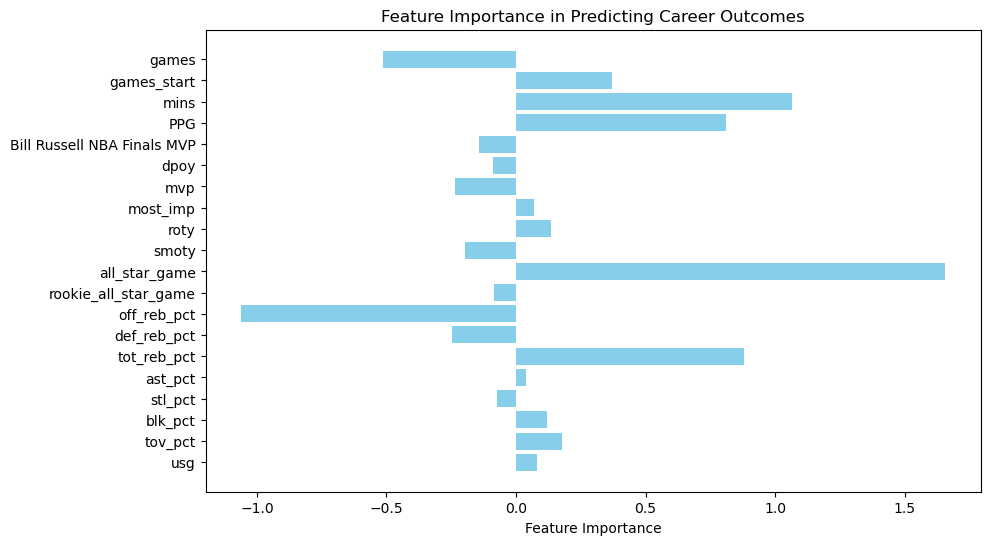

In [178]:
import matplotlib.pyplot as plt

# Extract feature importance from the logistic regression model
feature_importance = model.coef_[0]
feature_names = features

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Predicting Career Outcomes')
plt.gca().invert_yaxis()
plt.show()

## Part 2 -- Predicting Team Stats  

In this section, we're going to introduce a simple way to predict team offensive rebound percent in the next game and then discuss ways to improve those predictions.  
 
### Question 1   

Using the `rebounding_data` dataset, we'll predict a team's next game's offensive rebounding percent to be their average offensive rebounding percent in all prior games. On a single game level, offensive rebounding percent is the number of offensive rebounds divided by their number offensive rebound "chances" (essentially the team's missed shots). On a multi-game sample, it should be the total number of offensive rebounds divided by the total number of offensive rebound chances.    

Please calculate what OKC's predicted offensive rebound percent is for game 81 in the data. That is, use games 1-80 to predict game 81.  

In [12]:
#Created variable that returns the predicted OReb percentage for game 81
game81_oreb_chance = rebounding_data['offensive_rebounds'].sum() / rebounding_data['off_rebound_chances'].sum() * 100
print('Predicted Offensive Rebound Percentage: {:.1f}'.format(game81_oreb_chance))

Predicted Offensive Rebound Percentage: 28.1


<strong><span style="color:red">ANSWER 1:</span></strong>  

28.1% 

### Question 2  

There are a few limitations to the method we used above. For example, if a team has a great offensive rebounder who has played in most games this season but will be out due to an injury for the next game, we might reasonably predict a lower team offensive rebound percent for the next game.  

Please discuss how you would think about changing our original model to better account for missing players. You do not have to write any code or implement any changes, and you can assume you have access to any reasonable data that isn't provided in this project. Try to be clear and concise with your answer.  

<strong><span style="color:red">ANSWER 2:</span></strong>  

What I would do to better account for missing players would be to take each players rebounds per game and find the percentage of the teams total rebounds they accounted for. I would do this for every game available at the point in time that you need the information, then I would average each players percent of total team rebounds out and adjust the future games prediction by the percent the missing player accounts for. 

For example, say Chet Holmgren accounts for an average of 20% of the teams rebounds per game through 46 games and Jaylin Williams accounts for 5% of the teams total rebounds through 46 games. If Holmgren is missing, I would lower the predicted offensive rebound percentage by up to 15% because of the difference in total percent contribution to the teams rebounds between the two players. I say up to 15% because there is always a chance that Jaylin Williams will increase his share of the teams rebounds with more playing time, in fact, it is very probable this will happen. So reducing the total rebound percent by maybe 5-10% and adjust the percentage on a game to game basis. 

### Question 3  

In question 2, you saw and discussed how to deal with one weakness of the model. For this question, please write about 1-3 other potential weaknesses of the simple average model you made in question 1 and discuss how you would deal with each of them. You may either explain a weakness and discuss how you'd fix that weakness, then move onto the next issue, or you can start by explaining multiple weaknesses with the original approach and discuss one overall modeling methodology you'd use that gets around most or all of them. Again, you do not need to write any code or implement any changes, and you can assume you have access to any reasonable data that isn't provided in this project. Try to be clear and concise with your answer.  


<strong><span style="color:red">ANSWER 3:</span></strong>  

1. Lack of Seasonal Variation Handling
The original model assumes that the offensive rebound percentage remains constant throughout the season. We all know that as a season progresses, players and teams can get worn down and start to under-perform in some areas. To account for this, I would implement either a rolling average or a moving window approach. Instead of considering the average for all previous games, you would only calculate the average for the most recent games in order to give more weight to recent performances and capture changes in team dynamics.

2. Player Injuries and Lineup Changes
The original model does not account for injuries, trades or lineup changes. These can have a huge affect on rebounding percentage in the short term or on a game to game basis. To account for this issue, I would try to incorporate data on player availability and lineup changes. For example, some teams like to implement a strategy called 'small ball.' This means that a team would sacrifice height and power for speed and agility because it would create a mismatch between the guard-type players and the post players. The effect of this would be increased scoring but also decreased rebounding due to the sacrifice in height and power. 

3. Opponent Strength Variation
The model doesn't account for the differences between each team, it essentially treats everyone equally. To account for this, I would incorporate opponent-specific stats. This would help in identifying how the oppenent's capabilities compare to our own capabilities. We could even compare our stats versus a team we have already played to the stats of the opponent who has also played that team. This would give some insight as to whether we were able to perform better against a team we have both played.